# CS 580 RYL 4

## Setup

In [1]:
# dependencies
# import warnings

import jax
import jax.numpy as jnp
# import numpy as np
# import pandas as pd
# import PIL
# import scipy
# import sympy as sp
from matplotlib import pyplot as plt

# warnings.filterwarnings("ignore")


# Zac noted in recitation that we could use official package documentation 
# on the RYL's moving forward'. I did that for this assignment.

## RYL 4

In [2]:
# Consider the model:
# y= θ1 * e^(−θ2x) + θ3
# and the data points
# {(0, 2.300), (1, 1.036), (2, 0.571)}

def model(x, th):
    """
    x: scalar or vector
    th: 3-dim vector
    """
    return (th[0] * jnp.exp(-th[1]*x)) + th[2]

data = jnp.array([
    [0, 2.300],
    [1, 1.036],
    [2, 0.571]
])

data_x = data[:, 0]
data_y = data[:, 1]

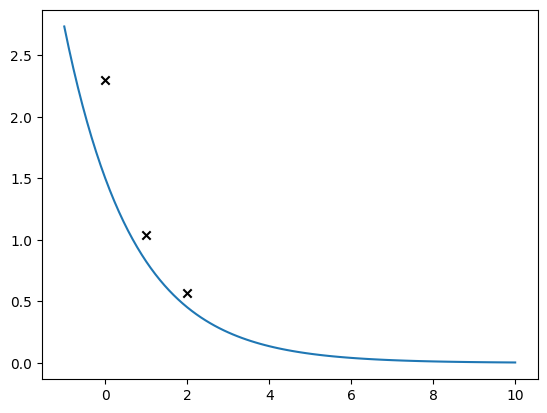

In [3]:
# plot a generic version of our model with the data for context

dummy_x = jnp.linspace(-1,10,100)
dummy_y = model(dummy_x, jnp.array([1.5,0.6,0])) # using theta from part c
plt.plot(dummy_x, dummy_y)
plt.scatter(data_x, data_y, marker="x", color="black")

In [4]:
# (a) Define your cost as the square of the l2 norm and write a function which takes vectors x,y,
# and θ and returns the cost.

def cost(x, y, th):
    """
    x: vector
    y: vector (same shape as x)
    th: 3-dim vector
    """
    return jnp.linalg.norm(y-model(x, th), ord=2)**2

In [5]:
# (b) Use an automatic differentiation library of your choice to take the gradient of your cost
# function

cost_gradient = jax.grad(cost, 2) # gradient with respect to theta

In [6]:
# (c) Calculate the normalized negative gradient (g_hat) at θ=(1.5, 0.6, 0)

theta_0 = jnp.array([1.5, 0.6, 0])
g_hat = jnp.linalg.norm(-cost_gradient(data_x, data_y, theta_0), ord=2)
g_hat

Array(3.0126598, dtype=float32)

(-10.0, 40.0)

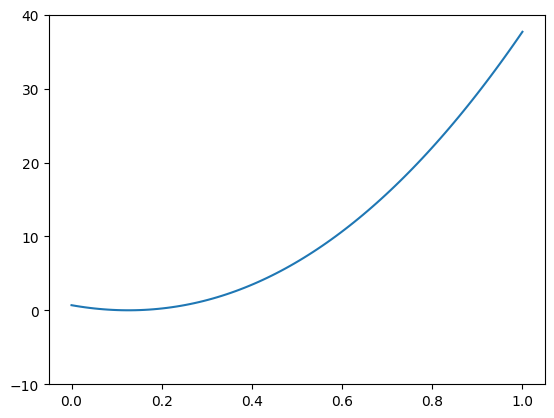

In [7]:
# (d) Plot L(θ0 + α*g_hat) where Lis your loss function, θ0 is the theta vector given in
# part c, g_hat is the normalized negative gradient from part c, and α is a scalar with
# values ranging from 0 to 1.

def L(alph):
    return [cost(data_x, data_y, theta_0 + a * g_hat) for a in alph]

alpha = jnp.linspace(0, 1, 100)
losses = L(alpha)

plt.plot(alpha, losses)
plt.ylim(-10,40)

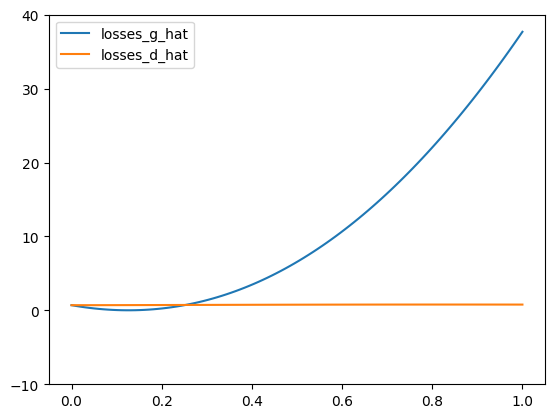

In [8]:
# (e) Using the same y-axis, plot L(θ0 + α*d_hat) where d_hat=(0.138, 0.983, 0.118)

def L_g(alph):
    return [cost(data_x, data_y, theta_0 + a * g_hat) for a in alph]

d_hat = jnp.array([0.138, 0.983, 0.118])

def L_d(alph):
    return [cost(data_x, data_y, theta_0 + a * d_hat) for a in alph]

alpha = jnp.linspace(0, 1, 100)
losses_g_hat = L_g(alpha)
losses_d_hat = L_d(alpha)


plt.plot(alpha, losses_g_hat, label="losses_g_hat")
plt.plot(alpha, losses_d_hat, label="losses_d_hat")
plt.ylim(-10,40)
plt.legend()

In [9]:
# (f) Using your two plots, explain why the gradient is useful in the context of modeling.

# the gradient is useful in the context of modeling because stepping around our cost surface with
# the gradient with respect to the parameters allows characterization of the cost surface, and
# can therefore help us to find minima.